#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - Decision Trees 2 <br> Date Updated: 01/20/2022

In [1]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
pwd()

'C:\\Dhruv\\Data\\4_Machine_Learning_with_Python\\3_Supervised Learning Essential Training\\Phase II - Modelling\\2_Dec Trees_v2_01.20.2022'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.253558 to fit



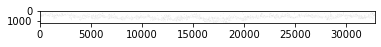

In [3]:
# load does  Data

does = pd.read_csv('1_readonly/Services.csv')

features = ['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White']
X = does[features]
y = does['Employed']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
dtree = DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [4]:
print(data)

digraph Tree {
node [shape=box] ;
0 [label="EducationLevel <= 18.5\ngini = 0.403\nsamples = 26784\nvalue = [19291, 7493]"] ;
1 [label="EducationLevel <= 11.5\ngini = 0.382\nsamples = 22368\nvalue = [16610, 5758]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="EducationLevel <= 6.5\ngini = 0.317\nsamples = 3140\nvalue = [2519, 621]"] ;
1 -> 2 ;
3 [label="Age_AtReg <= 28.5\ngini = 0.418\nsamples = 608\nvalue = [427, 181]"] ;
2 -> 3 ;
4 [label="Age_AtReg <= 25.5\ngini = 0.358\nsamples = 248\nvalue = [190, 58]"] ;
3 -> 4 ;
5 [label="Age_AtReg <= 24.5\ngini = 0.38\nsamples = 204\nvalue = [152, 52]"] ;
4 -> 5 ;
6 [label="Gender <= 1.5\ngini = 0.355\nsamples = 186\nvalue = [143, 43]"] ;
5 -> 6 ;
7 [label="Age_AtReg <= 17.5\ngini = 0.43\nsamples = 80\nvalue = [55, 25]"] ;
6 -> 7 ;
8 [label="Race_AfricanAmerican <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]"] ;
7 -> 8 ;
9 [label="CitizenStatus <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
8 -> 9 ;
10 [l

In [5]:
y_pred = dtree.predict(X_test)

In [6]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7676  546]
 [2642  615]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83      8222
           1       0.53      0.19      0.28      3257

    accuracy                           0.72     11479
   macro avg       0.64      0.56      0.55     11479
weighted avg       0.68      0.72      0.67     11479



In [7]:
# StandardScaler is used to remove the outliners

std_slc = StandardScaler()
pca = decomposition.PCA()
dtree2 = tree.DecisionTreeClassifier()

In [8]:
# Create pipeline to pass multuple parameters to gridsearch

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dtree2)])

In [9]:
# PCA reduces the dimension of features
n_components = list(range(1,X.shape[1]+1,1))


In [10]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [11]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [12]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11]})

In [13]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 4
Best Number Of Components: 1

DecisionTreeClassifier(max_depth=4)


In [14]:
# dtree = DecisionTreeClassifier(random_state=0, max_depth= 5)
# dtree = DecisionTreeClassifier(random_state=0, max_depth= 15)
# dtree = DecisionTreeClassifier(random_state=0,min_samples_leaf= 200)
# dtree = DecisionTreeClassifier(random_state=0,min_samples_leaf= 425)
